<a href="https://colab.research.google.com/github/LonghuaHu/deep-learning/blob/master/Comparison%20of%20QCNN%20and%20WCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Quaternion CNN

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import h5py 
#data
f = h5py.File('/content/drive/My Drive/Colab Notebooks/new_quaternionImages.mat','r') 

X = f['quaternionImages'][:]
#data = data.T
print(X.shape)

#lable
f = h5py.File('/content/drive/My Drive/Colab Notebooks/new_quaternionImagesLabels.mat','r') 
y = f['quaternionImagesLabels'][:]
y = y.T
print(y.shape)



(10000, 12, 14, 14)
(10000, 1)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [4]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 12, 14, 14) (2000, 12, 14, 14) (8000, 1) (2000, 1)


In [5]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3],1)
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3],1)
#training_labels = training_labels[0]
y_train.astype(int)
y_test.astype(int)
print('Number of training examples: ' + str(X_train.shape[0]))
print('Training images shape:' + str(X_train.shape))
print('Training labels shape:' + str(y_train.shape))
print('Test images shape:' + str(X_test.shape))
print('Test labels shape:' + str(y_test.shape))

Number of training examples: 8000
Training images shape:(8000, 12, 14, 14, 1)
Training labels shape:(8000, 1)
Test images shape:(2000, 12, 14, 14, 1)
Test labels shape:(2000, 1)


In [6]:
import os
import tensorflow as tf
from keras.callbacks import TensorBoard

Using TensorFlow backend.


## 2 conv layers, 1 pooling layer

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (3,3,3), activation='relu', input_shape=(12, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (3,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 10, 12, 12, 8)     224       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 8, 10, 10, 16)     3472      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 7, 5, 5, 16)       0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 7, 5, 5, 16)       64        
_________________________________________________________________
flatten (Flatten)            (None, 2800)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               358528    
_________________________________________________________________
dens

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_qcnn_2c1p = model.fit(X_train, y_train, epochs=20, verbose=1)
test_loss = model.evaluate(X_test, y_test)


#model.fit(X_train, y_train, epochs=30)
#test_loss = model.evaluate(X_test, y_test)

#model.fit(X_train, y_train, epochs=10,
#          validation_data=(X_test, y_test),
#          callbacks=[TrainValTensorBoard(write_graph=False)])

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
8000/8000 [==============================] - 6s 719us/sample - loss: 0.1564 - acc: 0.9461
Epoch 2/20
8000/8000 [==============================] - 3s 341us/sample - loss: 0.0589 - acc: 0.9804
Epoch 3/20
8000/8000 [==============================] - 3s 331us/sample - loss: 0.0271 - acc: 0.9904
Epoch 4/20
8000/8000 [==============================] - 3s 330us/sample - loss: 0.0144 - acc: 0.9952
Epoch 5/20
8000/8000 [==============================] - 3s 330us/sample - loss: 0.0087 - acc: 0.9970
Epoch 6/20
8000/8000 [==============================] - 3s 330us/sample - loss: 0.0039 - acc: 0.9986
Epoch 7/20
8000/8000 [==============================] - 3s 330us/sample - loss: 0.0029 - acc: 0.9990
Epoch 8/20
8000/8000 [==============================] - 3s 335us/sample - loss: 0.0021 - acc: 0.9995
Epoch 9/20
8000/8000 [==============================] - 3s 333us/sample - loss: 0.0018 - acc: 0.9994
Epoch 10/20
8000/8000 [====================

## 3 conv layers, 1 pooling layer

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (3,3,3), activation='relu', input_shape=(12, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (3,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (3,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_2 (Conv3D)            (None, 10, 12, 12, 8)     224       
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 8, 10, 10, 16)     3472      
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 6, 8, 8, 32)       13856     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 5, 4, 4, 32)       0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 5, 4, 4, 32)       128       
_________________________________________________________________
flatten_1 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               327808    
__________

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_qcnn_3c1p = model.fit(X_train, y_train, epochs=20, verbose=1)
test_loss = model.evaluate(X_test, y_test)


#model.fit(X_train, y_train, epochs=30)
#test_loss = model.evaluate(X_test, y_test)

#model.fit(X_train, y_train, epochs=10,
#          validation_data=(X_test, y_test),
#          callbacks=[TrainValTensorBoard(write_graph=False)])

Epoch 1/20
8000/8000 [==============================] - 3s 418us/sample - loss: 0.1771 - acc: 0.9374
Epoch 2/20
8000/8000 [==============================] - 3s 365us/sample - loss: 0.0508 - acc: 0.9841
Epoch 3/20
8000/8000 [==============================] - 3s 362us/sample - loss: 0.0143 - acc: 0.9942
Epoch 4/20
8000/8000 [==============================] - 3s 368us/sample - loss: 0.0092 - acc: 0.9969
Epoch 5/20
8000/8000 [==============================] - 3s 363us/sample - loss: 0.0069 - acc: 0.9974
Epoch 6/20
8000/8000 [==============================] - 3s 366us/sample - loss: 0.0043 - acc: 0.9990
Epoch 7/20
8000/8000 [==============================] - 3s 371us/sample - loss: 0.0032 - acc: 0.9990
Epoch 8/20
8000/8000 [==============================] - 3s 370us/sample - loss: 0.0014 - acc: 0.9994
Epoch 9/20
8000/8000 [==============================] - 3s 371us/sample - loss: 8.2773e-04 - acc: 0.9996
Epoch 10/20
8000/8000 [==============================] - 3s 367us/sample - loss: 0.0026

## 1 conv layer, 1 pooling layer

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (3,3,3), activation='relu', input_shape=(12, 14, 14, 1)))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_5 (Conv3D)            (None, 10, 12, 12, 8)     224       
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 9, 6, 6, 8)        0         
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 9, 6, 6, 8)        32        
_________________________________________________________________
flatten_2 (Flatten)          (None, 2592)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               331904    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 332,289
Trainable params: 332,273
Non-trainable params: 16
_________________________________________________________________


In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_qcnn_1c1p = model.fit(X_train, y_train, epochs=20, verbose=1)
test_loss = model.evaluate(X_test, y_test)


#model.fit(X_train, y_train, epochs=30)
#test_loss = model.evaluate(X_test, y_test)

#model.fit(X_train, y_train, epochs=10,
#          validation_data=(X_test, y_test),
#          callbacks=[TrainValTensorBoard(write_graph=False)])

Epoch 1/20
8000/8000 [==============================] - 2s 292us/sample - loss: 0.2555 - acc: 0.9189
Epoch 2/20
8000/8000 [==============================] - 2s 264us/sample - loss: 0.1121 - acc: 0.9644
Epoch 3/20
8000/8000 [==============================] - 2s 263us/sample - loss: 0.0849 - acc: 0.9745
Epoch 4/20
8000/8000 [==============================] - 2s 265us/sample - loss: 0.0546 - acc: 0.9796
Epoch 5/20
8000/8000 [==============================] - 2s 262us/sample - loss: 0.0485 - acc: 0.9847
Epoch 6/20
8000/8000 [==============================] - 2s 262us/sample - loss: 0.0435 - acc: 0.9852
Epoch 7/20
8000/8000 [==============================] - 2s 262us/sample - loss: 0.0330 - acc: 0.9877
Epoch 8/20
8000/8000 [==============================] - 2s 262us/sample - loss: 0.0287 - acc: 0.9904
Epoch 9/20
8000/8000 [==============================] - 2s 263us/sample - loss: 0.0223 - acc: 0.9926
Epoch 10/20
8000/8000 [==============================] - 2s 261us/sample - loss: 0.0216 - a

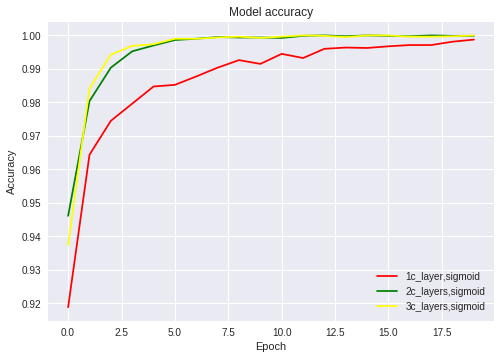

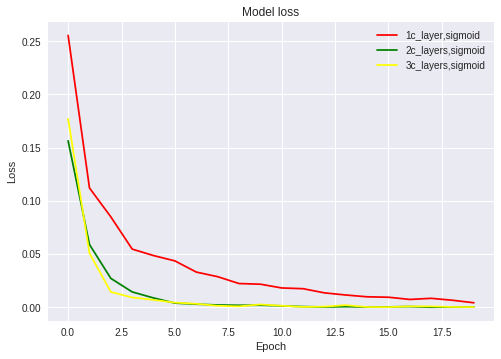

In [13]:
# Plot training accuracy values
plt.plot(history_qcnn_1c1p.history['acc'], color='red', label='1c_layer,sigmoid')
plt.plot(history_qcnn_2c1p.history['acc'], color='green', label='2c_layers,sigmoid')
plt.plot(history_qcnn_3c1p.history['acc'], color='yellow', label='3c_layers,sigmoid')
#plt.plot(history3.history['acc'], color='blue', label='1c_layer,tanh')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_qcnn_1c1p.history['loss'], color='red', label='1c_layer,sigmoid')
plt.plot(history_qcnn_2c1p.history['loss'], color='green', label='2c_layers,sigmoid')
plt.plot(history_qcnn_3c1p.history['loss'], color='yellow', label='3c_layers,sigmoid')
#plt.plot(history3.history['loss'], color='blue', label='1c_layer,tanh')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()



## 3 conv layer, 1 pooling layer,elu function

In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (3,3,3), activation='elu', input_shape=(12, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (3,3,3), activation='elu'))
model.add(tf.keras.layers.Conv3D(32, (3,3,3), activation='elu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_12 (Conv3D)           (None, 10, 12, 12, 8)     224       
_________________________________________________________________
conv3d_13 (Conv3D)           (None, 8, 10, 10, 16)     3472      
_________________________________________________________________
conv3d_14 (Conv3D)           (None, 6, 8, 8, 32)       13856     
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 5, 4, 4, 32)       0         
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 5, 4, 4, 32)       128       
_________________________________________________________________
flatten_5 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               327808    
__________

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_qcnn_3c1p_elu = model.fit(X_train, y_train, epochs=20, verbose=1)
test_loss = model.evaluate(X_test, y_test)


#model.fit(X_train, y_train, epochs=30)
#test_loss = model.evaluate(X_test, y_test)

#model.fit(X_train, y_train, epochs=10,
#          validation_data=(X_test, y_test),
#          callbacks=[TrainValTensorBoard(write_graph=False)])

Epoch 1/20
8000/8000 [==============================] - 3s 430us/sample - loss: 0.1789 - acc: 0.9339
Epoch 2/20
8000/8000 [==============================] - 3s 366us/sample - loss: 0.0490 - acc: 0.9819
Epoch 3/20
8000/8000 [==============================] - 3s 368us/sample - loss: 0.0260 - acc: 0.9921
Epoch 4/20
8000/8000 [==============================] - 3s 368us/sample - loss: 0.0125 - acc: 0.9960
Epoch 5/20
8000/8000 [==============================] - 3s 369us/sample - loss: 0.0089 - acc: 0.9979
Epoch 6/20
8000/8000 [==============================] - 3s 368us/sample - loss: 0.0071 - acc: 0.9984
Epoch 7/20
8000/8000 [==============================] - 3s 367us/sample - loss: 0.0055 - acc: 0.9985
Epoch 8/20
8000/8000 [==============================] - 3s 368us/sample - loss: 0.0071 - acc: 0.9985
Epoch 9/20
8000/8000 [==============================] - 3s 370us/sample - loss: 0.0052 - acc: 0.9990
Epoch 10/20
8000/8000 [==============================] - 3s 370us/sample - loss: 0.0027 - a

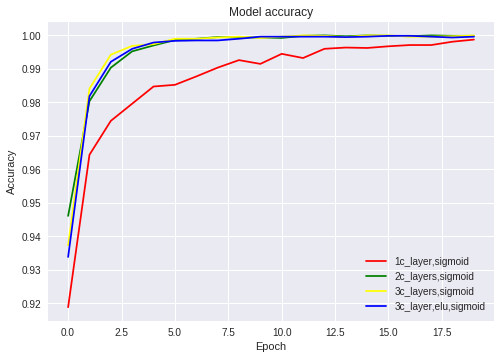

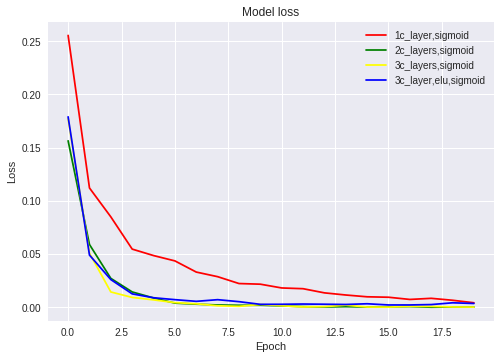

In [26]:
# Plot training accuracy values
plt.plot(history_qcnn_1c1p.history['acc'], color='red', label='1c_layer,sigmoid')
plt.plot(history_qcnn_2c1p.history['acc'], color='green', label='2c_layers,sigmoid')
plt.plot(history_qcnn_3c1p.history['acc'], color='yellow', label='3c_layers,sigmoid')
plt.plot(history_qcnn_3c1p_elu.history['acc'], color='blue', label='3c_layer,elu,sigmoid')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_qcnn_1c1p.history['loss'], color='red', label='1c_layer,sigmoid')
plt.plot(history_qcnn_2c1p.history['loss'], color='green', label='2c_layers,sigmoid')
plt.plot(history_qcnn_3c1p.history['loss'], color='yellow', label='3c_layers,sigmoid')
plt.plot(history_qcnn_3c1p_elu.history['loss'], color='blue', label='3c_layer,elu,sigmoid')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()





In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (3,3,3), activation='relu', input_shape=(12, 14, 14, 1)))
model.add(tf.keras.layers.Conv3D(16, (3,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (3,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(64, (3,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(128, (3,3,3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())

#model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_15 (Conv3D)           (None, 10, 12, 12, 8)     224       
_________________________________________________________________
conv3d_16 (Conv3D)           (None, 8, 10, 10, 16)     3472      
_________________________________________________________________
conv3d_17 (Conv3D)           (None, 6, 8, 8, 32)       13856     
_________________________________________________________________
conv3d_18 (Conv3D)           (None, 4, 6, 6, 64)       55360     
_________________________________________________________________
conv3d_19 (Conv3D)           (None, 2, 4, 4, 128)      221312    
_________________________________________________________________
batch_normalization_v1_6 (Ba (None, 2, 4, 4, 128)      512       
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)              0         
__________

In [28]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_qcnn_4c0p = model.fit(X_train, y_train, epochs=20, verbose=1)
test_loss = model.evaluate(X_test, y_test)


#model.fit(X_train, y_train, epochs=30)
#test_loss = model.evaluate(X_test, y_test)

#model.fit(X_train, y_train, epochs=10,
#          validation_data=(X_test, y_test),
#          callbacks=[TrainValTensorBoard(write_graph=False)])

Epoch 1/20
8000/8000 [==============================] - 5s 605us/sample - loss: 0.2604 - acc: 0.9169
Epoch 2/20
8000/8000 [==============================] - 4s 524us/sample - loss: 0.1089 - acc: 0.9664
Epoch 3/20
8000/8000 [==============================] - 4s 516us/sample - loss: 0.0590 - acc: 0.9815
Epoch 4/20
8000/8000 [==============================] - 4s 520us/sample - loss: 0.0393 - acc: 0.9889
Epoch 5/20
8000/8000 [==============================] - 4s 527us/sample - loss: 0.0317 - acc: 0.9902
Epoch 6/20
8000/8000 [==============================] - 4s 529us/sample - loss: 0.0209 - acc: 0.9934
Epoch 7/20
8000/8000 [==============================] - 4s 534us/sample - loss: 0.0195 - acc: 0.9944
Epoch 8/20
8000/8000 [==============================] - 4s 524us/sample - loss: 0.0113 - acc: 0.9967
Epoch 9/20
8000/8000 [==============================] - 4s 520us/sample - loss: 0.0102 - acc: 0.9962
Epoch 10/20
8000/8000 [==============================] - 4s 522us/sample - loss: 0.0028 - a

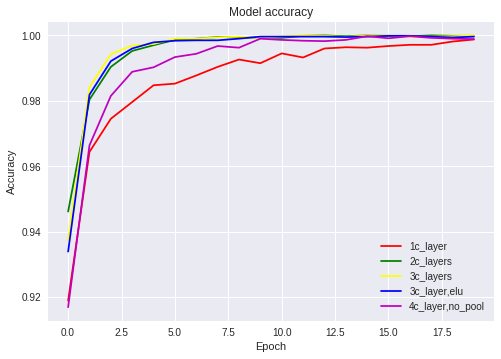

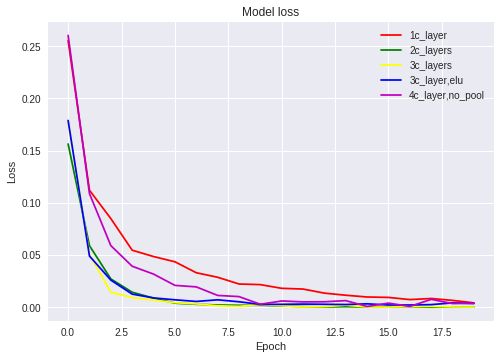

In [30]:
# Plot training accuracy values
plt.plot(history_qcnn_1c1p.history['acc'], color='red', label='1c_layer')
plt.plot(history_qcnn_2c1p.history['acc'], color='green', label='2c_layers')
plt.plot(history_qcnn_3c1p.history['acc'], color='yellow', label='3c_layers')
plt.plot(history_qcnn_3c1p_elu.history['acc'], color='blue', label='3c_layer,elu')
plt.plot(history_qcnn_4c0p.history['acc'], color='m', label='4c_layer,no_pool')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_qcnn_1c1p.history['loss'], color='red', label='1c_layer')
plt.plot(history_qcnn_2c1p.history['loss'], color='green', label='2c_layers')
plt.plot(history_qcnn_3c1p.history['loss'], color='yellow', label='3c_layers')
plt.plot(history_qcnn_3c1p_elu.history['loss'], color='blue', label='3c_layer,elu')
plt.plot(history_qcnn_4c0p.history['loss'], color='m', label='4c_layer,no_pool')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()





# With Wavelet CNN

# With original CNN

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

folder = "/content/drive/My Drive/Colab Notebooks/mnistdata"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(42, 45):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=28, height=28))

# Any results you write to the current directory are saved as output.

Working with 10000 images
Image examples: 
1_6564.png


0_3839.png


0_2070.png


In [0]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 28
image_height = 28
channels = 3

nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                     dtype=np.float32)

print(dataset.shape)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape(3,28,28)
    # Normalize
    x = x / 255.0
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

Files in train_files: 10000
(10000, 3, 28, 28)
250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
5250 images to array
5500 images to array
5750 images to array
6000 images to array
6250 images to array
6500 images to array
6750 images to array
7000 images to array
7250 images to array
7500 images to array
7750 images to array
8000 images to array
8250 images to array
8500 images to array
8750 images to array
9000 images to array
9250 images to array
9500 images to array
9750 images to array
10000 images to array
All images to array!


In [0]:
dataset.shape

(10000, 3, 28, 28)

In [0]:
X = dataset.reshape(len(train_files), image_height, image_width,channels)
print(X.shape)

(10000, 28, 28, 3)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y_train, test_size=0.2, random_state=42)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(8000, 28, 28, 3)
(2000, 28, 28, 3)
8000
2000


In [0]:
import os
import tensorflow as tf
from keras.callbacks import TensorBoard

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
#model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 8)         224       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_v1_16 (B (None, 11, 11, 32)        128       
_________________________________________________________________
flatten_16 (Flatten)         (None, 3872)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               495744    
__________

In [0]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_o1 = model.fit(X_train, y_train, epochs=20, verbose=1)
test_loss = model.evaluate(X_test, y_test)

Epoch 1/20
8000/8000 [==============================] - 3s 352us/sample - loss: 0.1101 - acc: 0.9626
Epoch 2/20
8000/8000 [==============================] - 2s 272us/sample - loss: 0.0417 - acc: 0.9869
Epoch 3/20
8000/8000 [==============================] - 2s 273us/sample - loss: 0.0285 - acc: 0.9915
Epoch 4/20
8000/8000 [==============================] - 2s 275us/sample - loss: 0.0182 - acc: 0.9940
Epoch 5/20
8000/8000 [==============================] - 2s 276us/sample - loss: 0.0122 - acc: 0.9958
Epoch 6/20
8000/8000 [==============================] - 2s 272us/sample - loss: 0.0080 - acc: 0.9970
Epoch 7/20
8000/8000 [==============================] - 2s 276us/sample - loss: 0.0062 - acc: 0.9977
Epoch 8/20
8000/8000 [==============================] - 2s 280us/sample - loss: 0.0040 - acc: 0.9983
Epoch 9/20
8000/8000 [==============================] - 2s 277us/sample - loss: 0.0040 - acc: 0.9985
Epoch 10/20
8000/8000 [==============================] - 2s 275us/sample - loss: 0.0039 - a

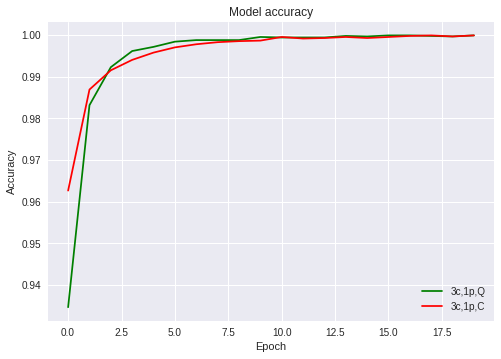

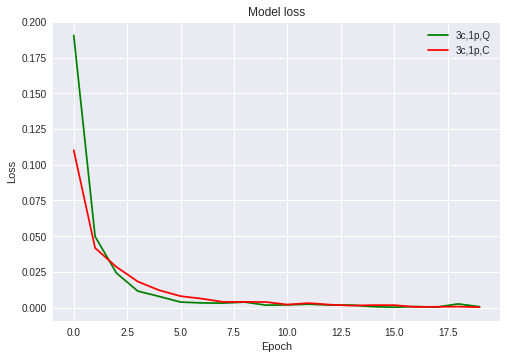

In [0]:
# Plot training accuracy values
plt.plot(history4.history['acc'], color='green', label='3c,1p,Q')
plt.plot(history_o1.history['acc'], color='red', label='3c,1p,C')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history4.history['loss'], color='green', label='3c,1p,Q')
plt.plot(history_o1.history['loss'], color='red', label='3c,1p,C')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()



In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
#model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 8)         224       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
batch_normalization_v1_17 (B (None, 12, 12, 16)        64        
_________________________________________________________________
flatten_17 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 129       
Total para

In [0]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_o2 = model.fit(X_train, y_train, epochs=20, verbose=1)
test_loss = model.evaluate(X_test, y_test)

Epoch 1/20
8000/8000 [==============================] - 2s 282us/sample - loss: 0.1324 - acc: 0.9538
Epoch 2/20
8000/8000 [==============================] - 2s 221us/sample - loss: 0.0497 - acc: 0.9840
Epoch 3/20
8000/8000 [==============================] - 2s 218us/sample - loss: 0.0355 - acc: 0.9879
Epoch 4/20
8000/8000 [==============================] - 2s 222us/sample - loss: 0.0272 - acc: 0.9912
Epoch 5/20
8000/8000 [==============================] - 2s 222us/sample - loss: 0.0205 - acc: 0.9930
Epoch 6/20
8000/8000 [==============================] - 2s 219us/sample - loss: 0.0137 - acc: 0.9950
Epoch 7/20
8000/8000 [==============================] - 2s 222us/sample - loss: 0.0121 - acc: 0.9959
Epoch 8/20
8000/8000 [==============================] - 2s 220us/sample - loss: 0.0119 - acc: 0.9961
Epoch 9/20
8000/8000 [==============================] - 2s 221us/sample - loss: 0.0089 - acc: 0.9969
Epoch 10/20
8000/8000 [==============================] - 2s 222us/sample - loss: 0.0065 - a

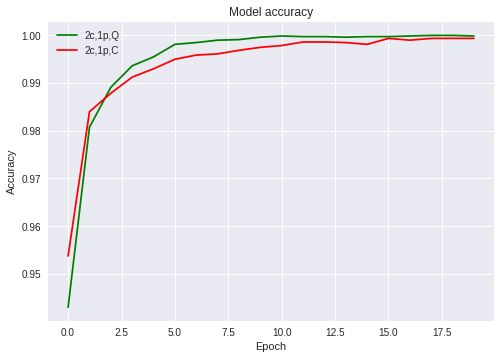

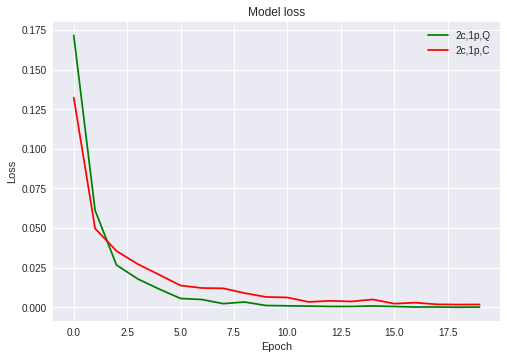

In [0]:
# Plot training accuracy values
plt.plot(history1.history['acc'], color='green', label='2c,1p,Q')
plt.plot(history_o2.history['acc'], color='red', label='2c,1p,C')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history1.history['loss'], color='green', label='2c,1p,Q')
plt.plot(history_o2.history['loss'], color='red', label='2c,1p,C')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

